In [194]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [195]:
df= pd.read_csv("/content/laptop_price.csv", encoding="latin-1")

In [196]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [197]:
df = df.drop("laptop_ID", axis=1)
df = df.drop("Product", axis=1)

In [198]:
df = df.join(pd.get_dummies(df.Company))
df = df.drop("Company", axis=1)
df = df.rename(columns={'Samsung': 'samsung'})

In [199]:
df = df.join(pd.get_dummies(df.TypeName))
df = df.drop("TypeName", axis=1)

In [200]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[-1])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[-1])
df = df.drop("ScreenResolution", axis=1)

In [201]:
df["CPU_Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df = df.join(pd.get_dummies(df.CPU_Brand))
df = df.drop("CPU_Brand", axis=1)
df = df.rename(columns={'AMD': 'amd'})
df = df.rename(columns={'Intel': 'intel'})
df["CPU_Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])
df["CPU_Frequency"] = df["CPU_Frequency"].str[:-3]
df = df.drop("Cpu", axis=1)

In [202]:
df["Ram"] = df["Ram"].str[:-2]

In [203]:
df["Memory_Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
def Memory_in_MB(value):
  if "GB" in value:
    return float(value[:value.find("GB")])*1000
  elif "TB" in value:
    return float(value[:value.find("TB")])*1000000
df["Memory_Amount"] = df["Memory_Amount"].apply(Memory_in_MB)
df["Memory_Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])
df = df.join(pd.get_dummies(df.Memory_Type))
df = df.drop("Memory_Type", axis=1)
df = df.drop("Memory", axis=1)

In [204]:
df["Gpu_Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])
df = df.drop("Gpu", axis=1)
df = df.join(pd.get_dummies(df.Gpu_Brand))
df = df.drop("Gpu_Brand", axis=1)

In [205]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

In [206]:
df["Weight"] = df["Weight"].str[:-2]

In [207]:
df

,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Nvidia,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13.3,8,1.37,1339.69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13.3,8,1.34,898.94,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15.6,8,1.86,575.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,15.4,16,1.83,2537.45,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13.3,8,1.37,1803.60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,1.8,638.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1299,13.3,16,1.3,1499.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1300,14.0,2,1.5,229.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1301,15.6,6,2.19,764.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [208]:
df.to_csv('dataset.csv', index=False)

In [209]:
X,y = df.drop("Price_euros", axis=1), df["Price_euros"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [210]:
forest = RandomForestRegressor()
forest.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [211]:
forest.score(X_test_scaled, y_test)

0.8714265135992549

In [212]:
y_pred=forest.predict(X_test_scaled)

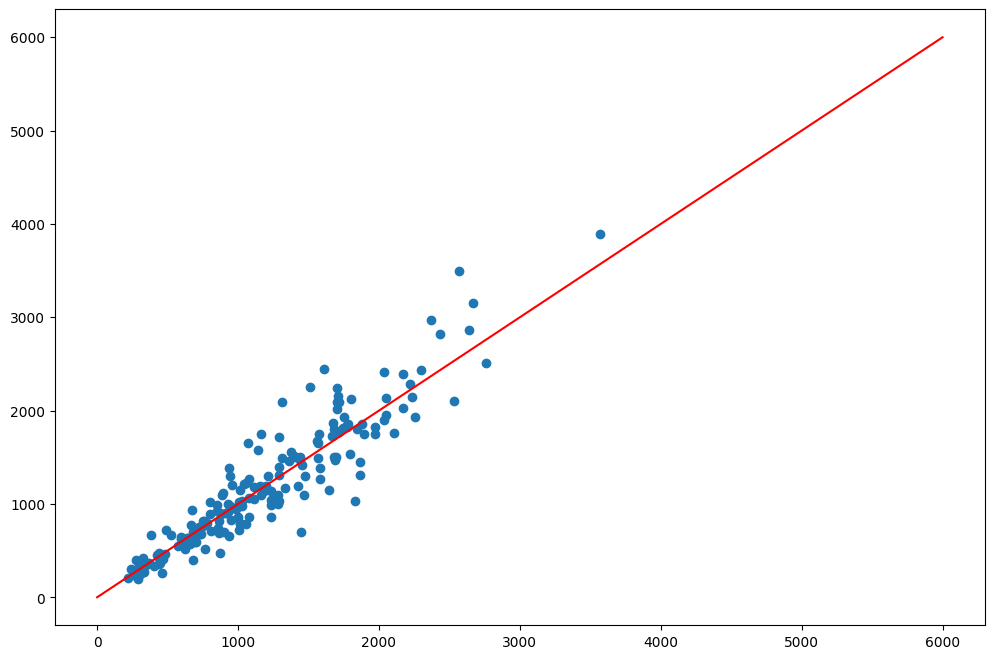

In [213]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0,6000), range(0, 6000), c="red")